# Regresion lineal simpre
El paquete sklearn para regresion lineal

In [2]:
import pandas as pd

In [3]:
data = pd.read_csv("https://raw.githubusercontent.com/joanby/python-ml-course/master/datasets/ads/Advertising.csv")
data.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [4]:
import statsmodels.formula.api as smf

In [5]:
# "Sales ~ TV"  ventas(variable predictora ~ en funcion de TV
lm = smf.ols(formula="Sales~TV", data=data).fit()

In [6]:
"""
El modelo lienal predictivo seria:
Sales = 7.032594 + 0.047537 * TV
(100 € mas de publicidad en TV se traduciria en 4.7 ventas adicionales del producto)
"""
lm.params

Intercept    7.032594
TV           0.047537
dtype: float64

In [7]:
"""
Se puede garantizar de que el parametro no es 0
"""
lm.pvalues

Intercept    1.406300e-35
TV           1.467390e-42
dtype: float64

In [8]:
lm.rsquared

0.611875050850071

In [9]:
"""
AIC & BIC mas elevado funcionara mejor
"""
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     312.1
Date:                Wed, 02 Mar 2022   Prob (F-statistic):           1.47e-42
Time:                        17:06:04   Log-Likelihood:                -519.05
No. Observations:                 200   AIC:                             1042.
Df Residuals:                     198   BIC:                             1049.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.0326      0.458     15.360      0.000       6.130       7.935
TV             0.0475      0.003     17.668      0.000       0.042       0.053
==============================================================================
Omnibus:                        0.531   Durbin-Watson:                   1.935
Prob(Omnibus):                  0.767   Jarque-Bera (JB):                0.669
Skew:                          -0.089   Prob(JB):                        0.716
Kurtosis:                       2.779   Cond. No.                         338.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Prediccione de ventas.

In [10]:
sales_pred = lm.predict(pd.DataFrame(data["TV"]))
sales_pred

0      17.970775
1       9.147974
2       7.850224
3      14.234395
4      15.627218
         ...    
195     8.848493
196    11.510545
197    15.446579
198    20.513985
199    18.065848
Length: 200, dtype: float64

Text(0, 0.5, 'Sales')

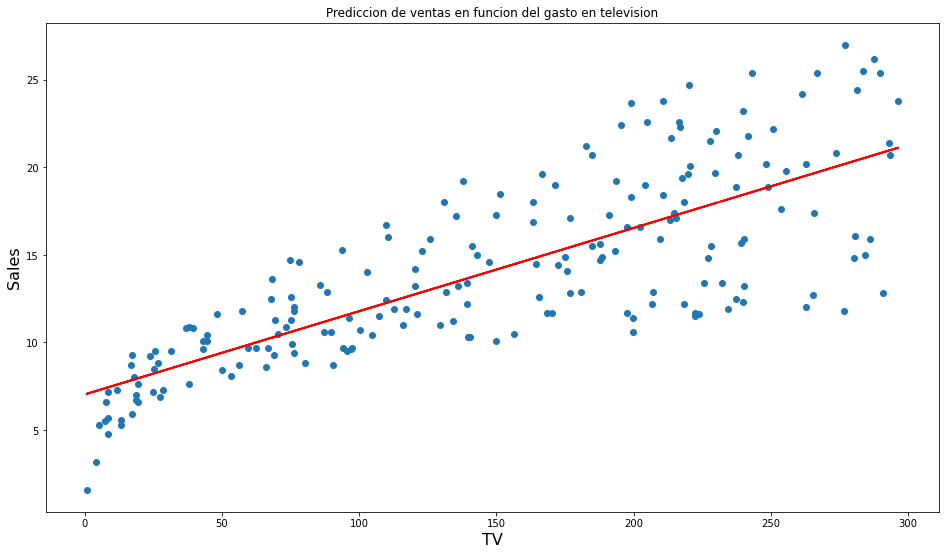

In [26]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(16, 9))
plt.scatter(x= data["TV"], y= data["Sales"])
plt.plot(data["TV"], sales_pred, color='red', linewidth = 2)
plt.title("Prediccion de ventas en funcion del gasto en television") 
plt.xlabel("TV", size = 16)
plt.ylabel("Sales", size = 16)

#### Los datos son los puntos azules.
* Cada punto representa una inversion en television (X) 
* Por cada inverisón en TV se incrementan las ventas.

### Regresion lineal múltiple en python

In [44]:
lm2 = smf.ols(formula="Sales~TV+Newspaper", data= data).fit()

In [45]:
lm2.params

Intercept    5.774948
TV           0.046901
Newspaper    0.044219
dtype: float64

In [46]:
"""
todos los parametros son los suficientemente pequeños y no nulos (no ceros)
Por lo que parece que el modelo parece consistente.
Sales = 5.507584 + 0.046901 * TV + 0.044219 * Newspaper
"""
lm2.pvalues

Intercept    3.145860e-22
TV           5.507584e-44
Newspaper    2.217084e-05
dtype: float64

In [47]:
"""
rsquared es mayor que el modelo anterior por lo que parece una ligera mejora.
"""
lm2.rsquared

0.6458354938293271

In [48]:
sales_pred= lm2.predict(data[["TV", "Newspaper"]])
sales_pred

0      19.626901
1       9.856348
2       9.646055
3      15.467318
4      16.837102
         ...    
195     8.176802
196    10.551220
197    14.359467
198    22.003458
199    17.045429
Length: 200, dtype: float64

In [49]:
"""
Mejora insignaficante al añadir el periodico al modelo original.
"""
lm2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.646
Model:                            OLS   Adj. R-squared:                  0.642
Method:                 Least Squares   F-statistic:                     179.6
Date:                Tue, 01 Mar 2022   Prob (F-statistic):           3.95e-45
Time:                        17:55:56   Log-Likelihood:                -509.89
No. Observations:                 200   AIC:                             1026.
Df Residuals:                     197   BIC:                             1036.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      5.7749      0.525     10.993      0.000       4.739       6.811
TV             0.0469      0.003     18.173      0.000       0.042       0.052
Newspaper      0.0442      0.010      4.346      0.000       0.024       0.064
==============================================================================
Omnibus:                        0.658   Durbin-Watson:                   1.969
Prob(Omnibus):                  0.720   Jarque-Bera (JB):                0.415
Skew:                          -0.093   Prob(JB):                        0.813
Kurtosis:                       3.122   Cond. No.                         410.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [52]:
"""
el prob(F-statistic) es sumamente pequeño respecto a los anteriores.
F-statistic es muy grande respecto al anterior
R-squared se acerca casi al 90%
"""
lm3 = smf.ols(formula="Sales~TV+Radio", data= data).fit()
lm3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     859.6
Date:                Tue, 01 Mar 2022   Prob (F-statistic):           4.83e-98
Time:                        17:56:20   Log-Likelihood:                -386.20
No. Observations:                 200   AIC:                             778.4
Df Residuals:                     197   BIC:                             788.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9211      0.294      9.919      0.000       2.340       3.502
TV             0.0458      0.001     32.909      0.000       0.043       0.048
Radio          0.1880      0.008     23.382      0.000       0.172       0.204
==============================================================================
Omnibus:                       60.022   Durbin-Watson:                   2.081
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              148.679
Skew:                          -1.323   Prob(JB):                     5.19e-33
Kurtosis:                       6.292   Cond. No.                         425.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [53]:
sales_pred= lm3.predict(data[["TV", "Radio"]])
sales_pred

0      20.555465
1      12.345362
2      12.337018
3      17.617116
4      13.223908
         ...    
195     5.364512
196     8.152375
197    12.768048
198    23.792923
199    15.157543
Length: 200, dtype: float64

In [55]:
"""
El intervalo de confianza coge el 0 en newspaper [0.025, 0.975] esta entre -0.013 y 0.011  
Parece que invertir en periodico resta ventas -0.0010 -> (coef)
Todo apunta a que hay que quitarlo.
"""
lm4 = smf.ols(formula="Sales~TV+Radio+Newspaper", data= data).fit()
lm4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Tue, 01 Mar 2022   Prob (F-statistic):           1.58e-96
Time:                        18:02:32   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9389      0.312      9.422      0.000       2.324       3.554
TV             0.0458      0.001     32.809      0.000       0.043       0.049
Radio          0.1885      0.009     21.893      0.000       0.172       0.206
Newspaper     -0.0010      0.006     -0.177      0.860      -0.013       0.011
==============================================================================
Omnibus:                       60.414   Durbin-Watson:                   2.084
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              151.241
Skew:                          -1.327   Prob(JB):                     1.44e-33
Kurtosis:                       6.332   Cond. No.                         454.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Multicolinealidad
* correlación entre variables predictoras del modelo. (cuando hay una correlacion significativa, puede causar problemas en el modelo) una interactua negativamente con la otra

#### Intentaremos buscar una realcion lineal entre el gasto de television y las ventas.
#### Factor de inflacion de la Varienza
* Newapaper ~ TV + Radio -> R^2 VIF = 1/(1-R^2)
* si VIF = 1 las variables no tienen nada de correlacion
* si VIF < 5 pueden formar parte del modelo (correlacion moderada)
* si VIF > 5 son altamente correlacionadas y necesitan ser eliminada del modelo.

In [57]:
#Newapaper ~ TV + Radio -> R^2 VIF = 1/(1-R^2)
#Hay que escribir la variable que nos da problemas en funcion de las demás.
lm_n = smf.ols(formula="Newspaper~TV+Radio", data = data).fit()
rsquared_n = lm_n.rsquared
VIF = 1/(1-rsquared_n)
VIF

1.1451873787239286

In [58]:
#TV ~ Newspaper + Radio -> R^2 VIF = 1/(1-R^2)
lm_tv = smf.ols(formula="TV~Newspaper+Radio", data = data).fit()
rsquared_tv = lm_tv.rsquared
VIF = 1/(1-rsquared_tv)
VIF

1.0046107849396502

In [59]:
#Radio ~ TV + Newspaper -> R^2 VIF = 1/(1-R^2)
lm_r = smf.ols(formula="Radio~Newspaper+TV", data = data).fit()
rsquared_r = lm_r.rsquared
VIF = 1/(1-rsquared_r)
VIF

1.1449519171055353

El peridico y la radio tienen casi el mismo VIF por lo que indica que estan altamente correlacionadas.
El modelo con las 3 variables no mejora, y nos quedamos con la radio porque nos da una mejor precisión.

In [60]:
lm3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     859.6
Date:                Tue, 01 Mar 2022   Prob (F-statistic):           4.83e-98
Time:                        18:13:04   Log-Likelihood:                -386.20
No. Observations:                 200   AIC:                             778.4
Df Residuals:                     197   BIC:                             788.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9211      0.294      9.919      0.000       2.340       3.502
TV             0.0458      0.001     32.909      0.000       0.043       0.048
Radio          0.1880      0.008     23.382      0.000       0.172       0.204
==============================================================================
Omnibus:                       60.022   Durbin-Watson:                   2.081
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              148.679
Skew:                          -1.323   Prob(JB):                     5.19e-33
Kurtosis:                       6.292   Cond. No.                         425.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""